# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-07-31 08:01:00.343070


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/30/20


,7/30/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,4494601,152055,3.38
Brazil,2610102,91263,3.50
United Kingdom,303910,46084,15.16
Mexico,416179,46000,11.05
India,1634746,35718,2.18
Italy,247158,35132,14.21
France,222469,30241,13.59


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/30/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
33040,US,4356206,2020-07-28,149374.0,1362.0,65869.0,65285.000000
33039,US,4290337,2020-07-27,148012.0,1077.0,56414.0,65094.285714
33038,US,4233923,2020-07-26,146935.0,470.0,54953.0,65809.000000
33037,US,4178970,2020-07-25,146465.0,905.0,66439.0,66793.857143
33036,US,4112531,2020-07-24,145560.0,1130.0,73715.0,66402.285714
33035,US,4038816,2020-07-23,144430.0,1114.0,68695.0,66094.142857
33034,US,3970121,2020-07-22,143316.0,1195.0,70910.0,67317.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/30/20


,7/30/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,414370,32683.0,7.89
New Jersey,180970,15809.0,8.74
California,492934,9026.0,1.83
Massachusetts,116684,8580.0,7.35
Illinois,178135,7670.0,4.31
Pennsylvania,115807,7194.0,6.21
Florida,461379,6586.0,1.43


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/30/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1143,California,470762,2020-07-28,8679.0,185.0,12641.0,8779.571429
1142,California,458121,2020-07-27,8494.0,46.0,5833.0,8607.285714
1141,California,452288,2020-07-26,8448.0,40.0,5836.0,9340.285714
1140,California,446452,2020-07-25,8408.0,71.0,6267.0,9386.714286
1139,California,440185,2020-07-24,8337.0,136.0,9412.0,9560.857143
1138,California,430773,2020-07-23,8201.0,154.0,9487.0,9438.142857
1137,California,421286,2020-07-22,8047.0,159.0,11981.0,9485.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 7/30/20


,7/30/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,186036,4559.0,2.45
Riverside,36629,688.0,1.88
Orange,35778,604.0,1.69
San Diego,28688,558.0,1.95
San Bernardino,31688,419.0,1.32
Imperial,9298,200.0,2.15
Santa Clara,9731,190.0,1.95


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/30/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3626,Los Angeles,178642,2020-07-28,4426.0,51.0,2614.0,2373.857143
3625,Los Angeles,176028,2020-07-27,4375.0,15.0,2011.0,2426.142857
3624,Los Angeles,174017,2020-07-26,4360.0,9.0,1692.0,2585.714286
3623,Los Angeles,172325,2020-07-25,4351.0,51.0,3390.0,2739.000000
3622,Los Angeles,168935,2020-07-24,4300.0,37.0,2067.0,2644.428571
3621,Los Angeles,166868,2020-07-23,4263.0,48.0,1734.0,2741.428571
3620,Los Angeles,165134,2020-07-22,4215.0,60.0,3109.0,3132.428571
3619,Los Angeles,162025,2020-07-21,4155.0,51.0,2980.0,3064.142857
3618,Los Angeles,159045,2020-07-20,4104.0,8.0,3128.0,3241.142857
3617,Los Angeles,155917,2020-07-19,4096.0,12.0,2765.0,3195.428571



7 day new US cases as of 7/30/20


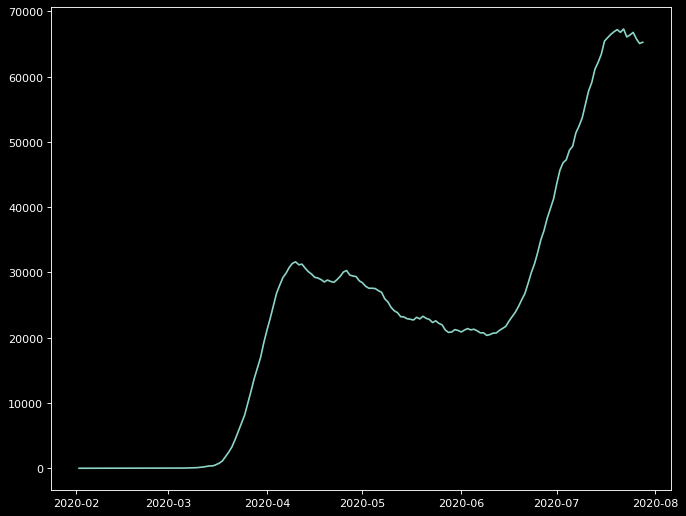

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/30/20


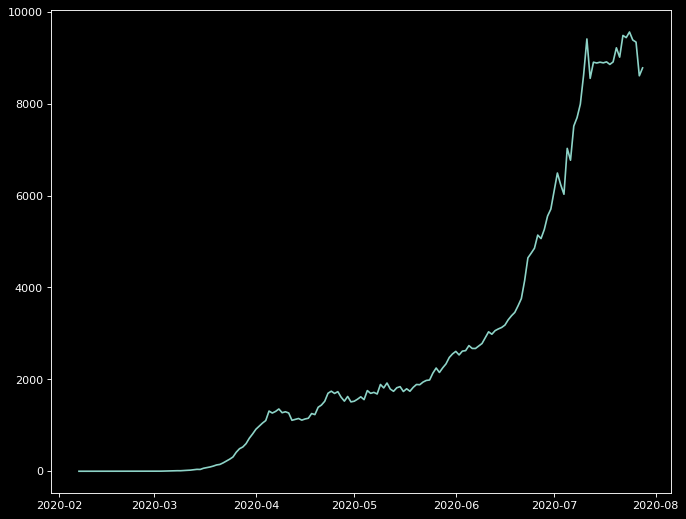

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/30/20


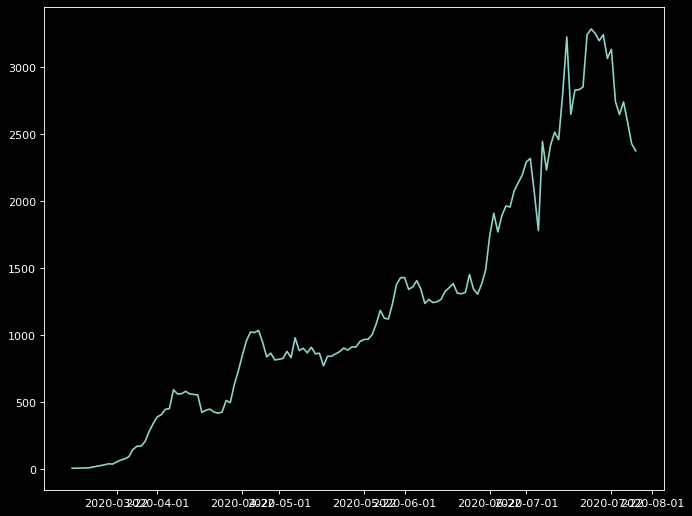

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()